In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Model,load_model,Sequential
from tensorflow.keras.layers import*
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


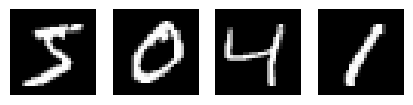

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

plt.subplot(2,5,1)
plt.imshow(x_train[0],cmap=plt.get_cmap('gray'))
plt.axis('off')

plt.subplot(2,5,2)
plt.imshow(x_train[1],cmap=plt.get_cmap('gray'))
plt.axis('off')

plt.subplot(2,5,3)
plt.imshow(x_train[2],cmap=plt.get_cmap('gray'))
plt.axis('off')

plt.subplot(2,5,4)
plt.imshow(x_train[3],cmap=plt.get_cmap('gray'))
plt.axis('off')

plt.show()

In [4]:
trainX = x_train.astype('float32')
testX = x_test.astype('float32')

trainX/=255.0
testX/=255.0

y_train = tf.keras.utils.to_categorical(y_train,10)
y_test = tf.keras.utils.to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

print(y_train[0:5,])
print(y_test[0:5,])


(60000, 10)
(10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [5]:
x_train=trainX.reshape(trainX.shape[0],28,28,1)
x_test=testX.reshape(testX.shape[0],28,28,1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
inputs = Input((28,28,1))
x = Flatten()(inputs)
x = Dense(16,activation='relu')(x)
x = Dense(32,activation='relu')(x)
outputs= Dense(10,activation='softmax')(x)
model = Model(inputs=inputs, outputs =outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │          12,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,434 (52.48 KB)

 Trainable params: 13,434 (52.48 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=50,batch_size=128,validation_data=(x_test,y_test),verbose=1)

Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6967 - loss: 1.0146 - val_accuracy: 0.9200 - val_loss: 0.2768
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9225 - loss: 0.2667 - val_accuracy: 0.9357 - val_loss: 0.2203
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9407 - loss: 0.2109 - val_accuracy: 0.9444 - val_loss: 0.1916
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9459 - loss: 0.1902 - val_accuracy: 0.9493 - val_loss: 0.1762
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9516 - loss: 0.1688 - val_accuracy: 0.9495 - val_loss: 0.1748
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9562 - loss: 0.1525 - val_accuracy: 0.9536 - val_loss: 0.1638
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9566 - loss: 0.1482 - val_accuracy: 0.9527 - val_loss: 0.1630
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9590 - loss: 0.1400 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Text(0.5, 0, 'Epoch')

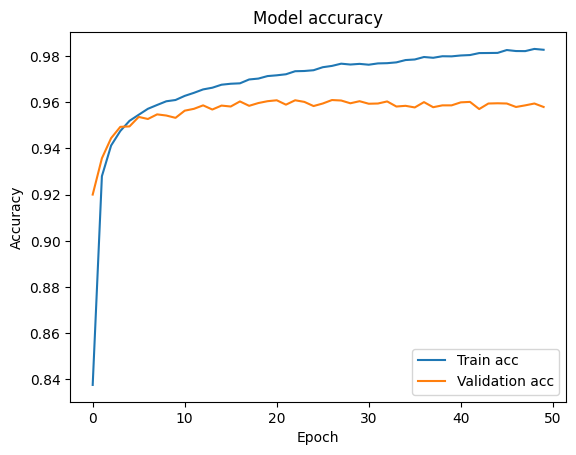

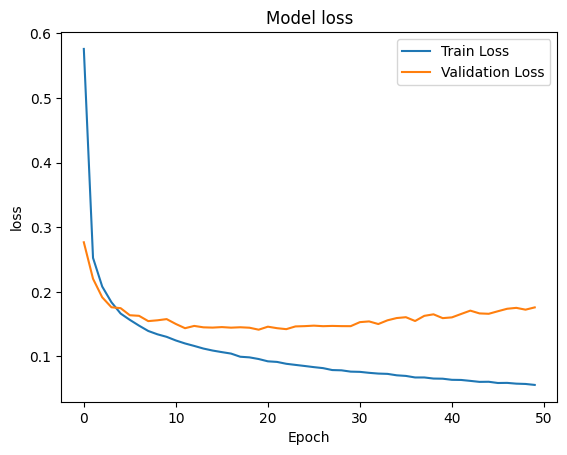

In [9]:
print(history.history.keys())

import matplotlib.pyplot as plt

f , ax = plt.subplots()
ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.legend(['Train acc','Validation acc'])
ax.set_title('Model accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')


f , ax = plt.subplots()
ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
ax.legend(['Train Loss','Validation Loss'])
ax.set_title('Model loss')
ax.set_ylabel('loss')
ax.set_xlabel('Epoch')


In [10]:
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

Test loss: 0.17599555850028992
Test accuracy: 0.9578999876976013


In [15]:
y_pred=model.predict(x_test)
y_test_class=np.argmax(y_test,axis=1)
print("Test hand written Digit")
print(y_test_class[:10])
y_pred_class=np.argmax(y_pred,axis=1)
print("predicted hand written digit")
print(y_pred_class[:10])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test hand written Digit
[7 2 1 0 4 1 4 9 5 9]
predicted hand written digit
[7 2 1 0 4 1 4 9 5 9]


In [16]:
from sklearn.metrics import confusion_matrix,classification_report

print("performance metrics")
metrices=classification_report(y_test_class,y_pred_class)
print(metrices)
print("confusion matrix")
CM=confusion_matrix(y_test_class,y_pred_class)
print(CM)


performance metrics
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.95      0.95      0.95      1032
           3       0.94      0.96      0.95      1010
           4       0.95      0.95      0.95       982
           5       0.96      0.96      0.96       892
           6       0.97      0.96      0.96       958
           7       0.96      0.96      0.96      1028
           8       0.95      0.94      0.94       974
           9       0.97      0.93      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000

confusion matrix
[[ 958    0    1    1    0    4    7    3    4    2]
 [   0 1122    1    2    1    0    3    1    5    0]
 [   4    4  978   11    2    0    5   11   17    0]
 [   0    0   11  969    1   12    0    5   1